# Cyclists Dataset Understanding

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
races = pd.read_csv("../data/races.csv")

In [4]:
dataset = pd.read_csv("../data/cyclists.csv")
dataset.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [5]:
dataset.info()
# birth year, heigth -> float to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [6]:
dataset.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

In [7]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset) # compute the percentage of missing values
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})

missing_value_df['percent_missing']

_url            0.000000
name            0.000000
birth_year      0.211933
weight         49.820672
height         48.761004
nationality     0.016303
Name: percent_missing, dtype: float64

In [8]:
missing_birthyear = dataset[dataset['birth_year'].isnull()]['_url'].to_list()
dataset[dataset['birth_year'].isnull()]

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,NaN,NaN,NaN,NaN
601,vladimir-malakov,Vladimir Malakov,NaN,NaN,NaN,Russia
894,antonio-zanini,Antonio Zanini,NaN,NaN,NaN,Italy
2408,filippo-simonetti,Filippo Simonetti,NaN,NaN,NaN,Italy
2515,carlos-garcia,Carlos García,NaN,NaN,NaN,Spain
2536,alexandr-osipov,Alexandr Osipov,NaN,NaN,NaN,Russia
3046,nicolai-kosyakov,Nicolai Kosyakov,NaN,NaN,NaN,Russia
3551,nevens-guy,Guy Nevens,NaN,NaN,NaN,Belgium
4142,oscar-pumar,Oscar Pumar,NaN,NaN,NaN,Venezuela
4384,javier-luquin,Javier Luquin,NaN,NaN,NaN,Spain


### Tentativo di imputazione manuale delle date di nascita mancanti sfruttando i dati del dataset 'races.csv'

I ciclisti nel dataset 'cyclist.csv' hanno età NaN in ogni record del dataset 'races.csv'

In [9]:
# cyclist
tmp_df = races[races['cyclist'].isin(missing_birthyear)]
tmp_df[tmp_df['cyclist_age'].notnull()]

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta


Abbiamo cercato di recuperare più dati possibile manualmente attraverso ricerce online supportate da confronti diretti con altri dati presenti nel dataset 'races.csv'

Una volta identificato un ciclista con alta probabilità abbiamo fatto una imputazione manuale del valore ottenuto nella feature 'birth_year' corrispondente

In [10]:
dataset.loc[dataset['_url'] == 'scott-davies', 'birth_year'] = 1995
dataset.loc[dataset['_url'] == 'vladimir-malakov', 'birth_year'] = 1958
dataset.loc[dataset['_url'] == 'antonio-zanini', 'birth_year'] = 1965
dataset.loc[dataset['_url'] == 'nevens-guy', 'birth_year'] = 1962
dataset.loc[dataset['_url'] == 'sergei-jermachenko', 'birth_year'] = 1956 

Ragionamento simile fatto anche per la nazionalità. L'unica mancante apparteneva al ciclista Scott Davies che era già stato correttamente identificato nella fase precedente, grazie a cui abbiamo rivenuto anche questa informazione

In [11]:
dataset.loc[dataset['_url'] == 'scott-davies', 'nationality'] = 'Great Britain'

In [12]:
dataset.isnull().sum() # check if missing values are filled correctly

_url              0
name              0
birth_year        8
weight         3056
height         2991
nationality       0
dtype: int64

In [13]:
dataset[dataset['height'].isnull() & dataset['weight'].isnull()]

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
6,willy-moonen,Willy Moonen,1947.0,NaN,NaN,Belgium
9,scott-davies,Scott Davies,1995.0,NaN,NaN,Great Britain
10,stian-remme,Stian Remme,1982.0,NaN,NaN,Norway
13,evgueny-anachkine,Evgueny Anachkine,1970.0,NaN,NaN,Russia
...,...,...,...,...,...,...
6123,francisque-teyssier,Francisque Teyssier,1969.0,NaN,NaN,France
6127,hendrik-van-dyck,Hendrik Van Dyck,1974.0,NaN,NaN,Belgium
6128,francisco-jose-pacheco,Francisco José Pacheco,1982.0,NaN,NaN,Spain
6129,juan-jose-martinez-diaz,Juan José Martínez,1966.0,NaN,NaN,Spain


Quasi tutti quelli che non hanno l'altezza non hanno il peso

In [14]:
dataset.describe()

,birth_year,weight,height
count,6126.000000,3078.000000,3143.000000
mean,1974.066275,68.658739,179.815145
std,15.536065,6.348183,6.443447
min,1933.000000,48.000000,154.000000
25%,1962.000000,64.000000,175.000000
50%,1974.000000,69.000000,180.000000
75%,1987.000000,73.000000,184.000000
max,2004.000000,94.000000,204.000000


Ricerca di valori di default che nascondono valori mancanti

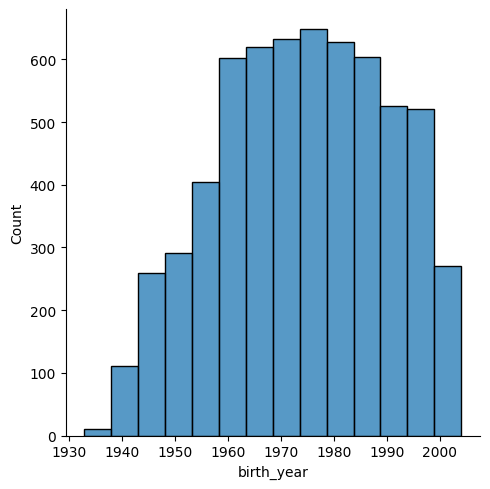

In [15]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset, 
                x="birth_year", 
                kind="hist",
                row_order="desc",
                bins=n_bins) #TODO: cambia nome dell'asse x

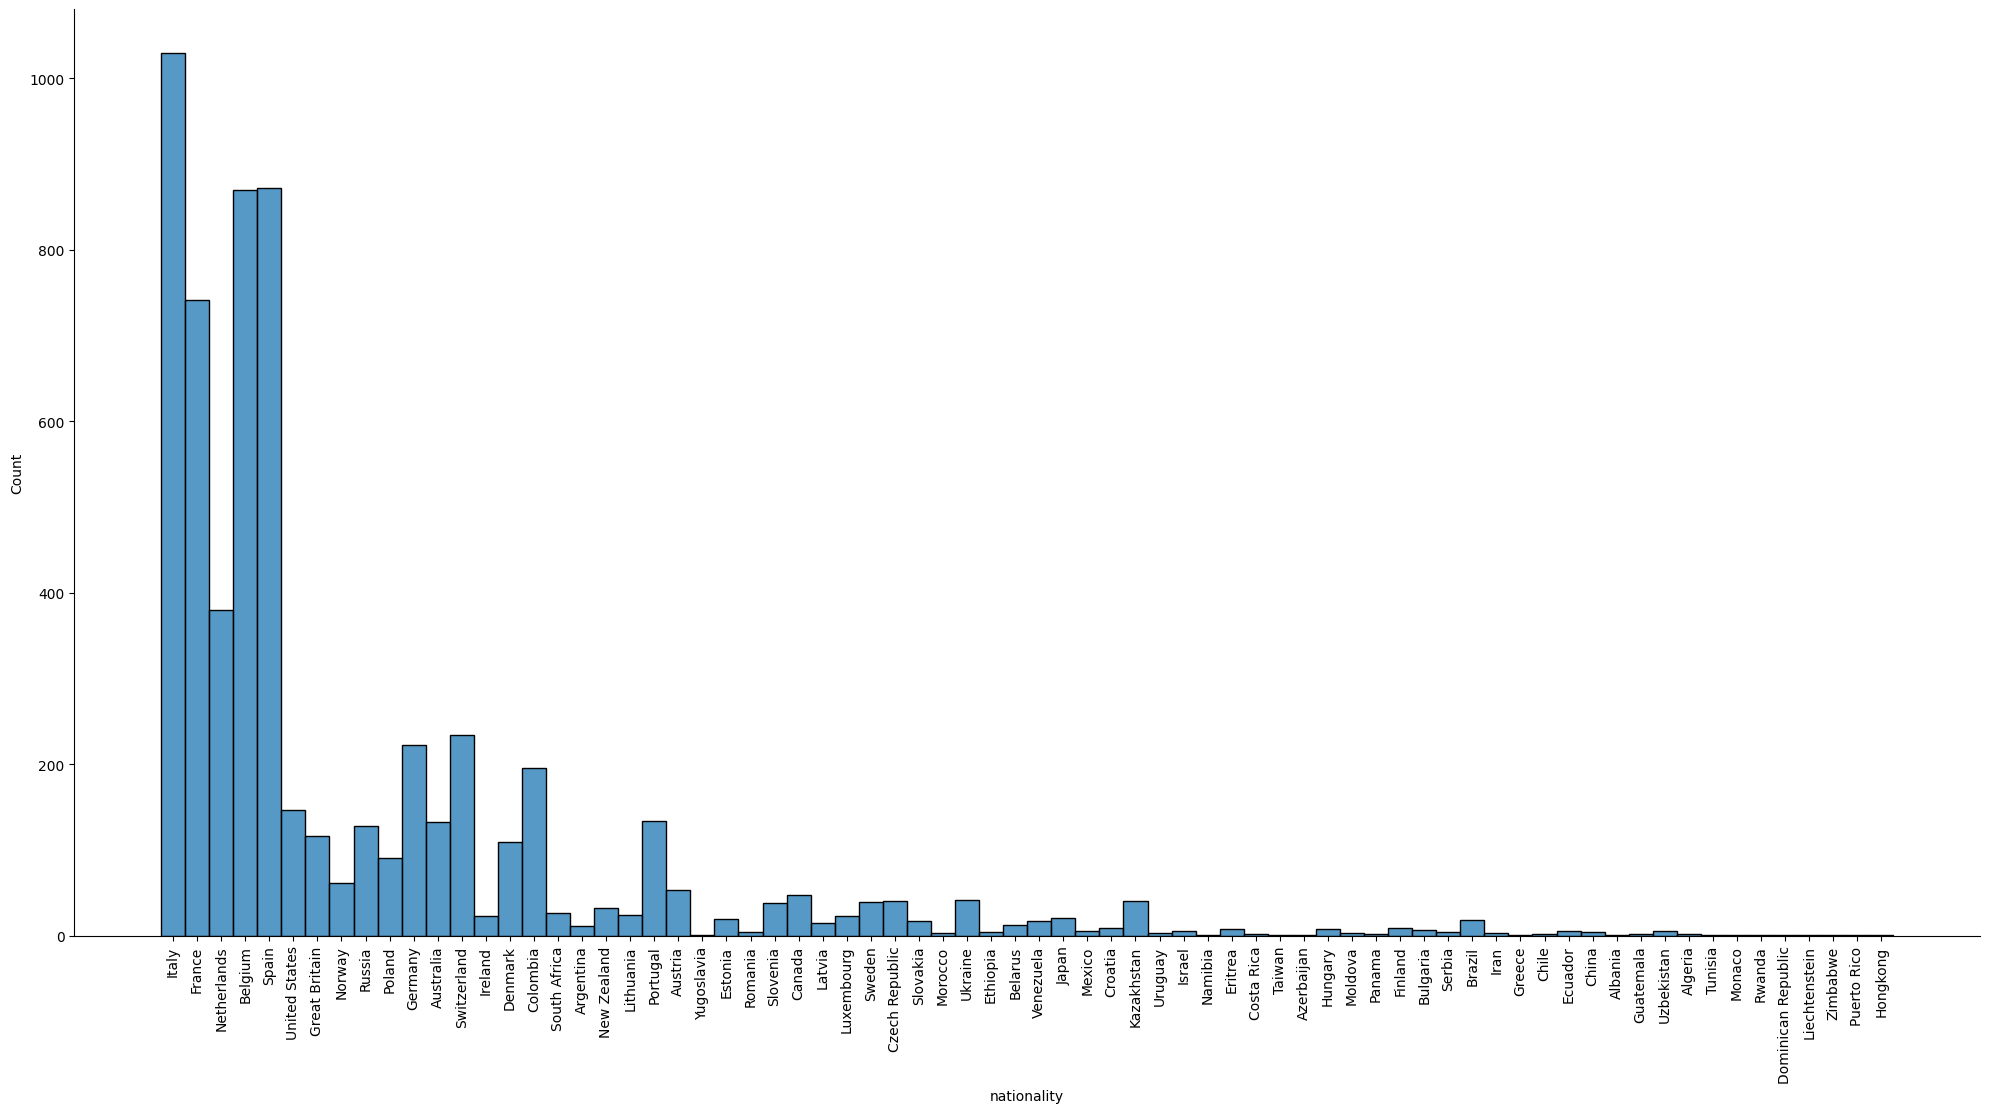

In [16]:
sb.displot(dataset, 
                x="nationality", 
                kind="hist",
                row_order="desc",
                bins=len(dataset['nationality'].unique()),
                height=10,
                aspect=2)
plt.xticks(rotation=90);

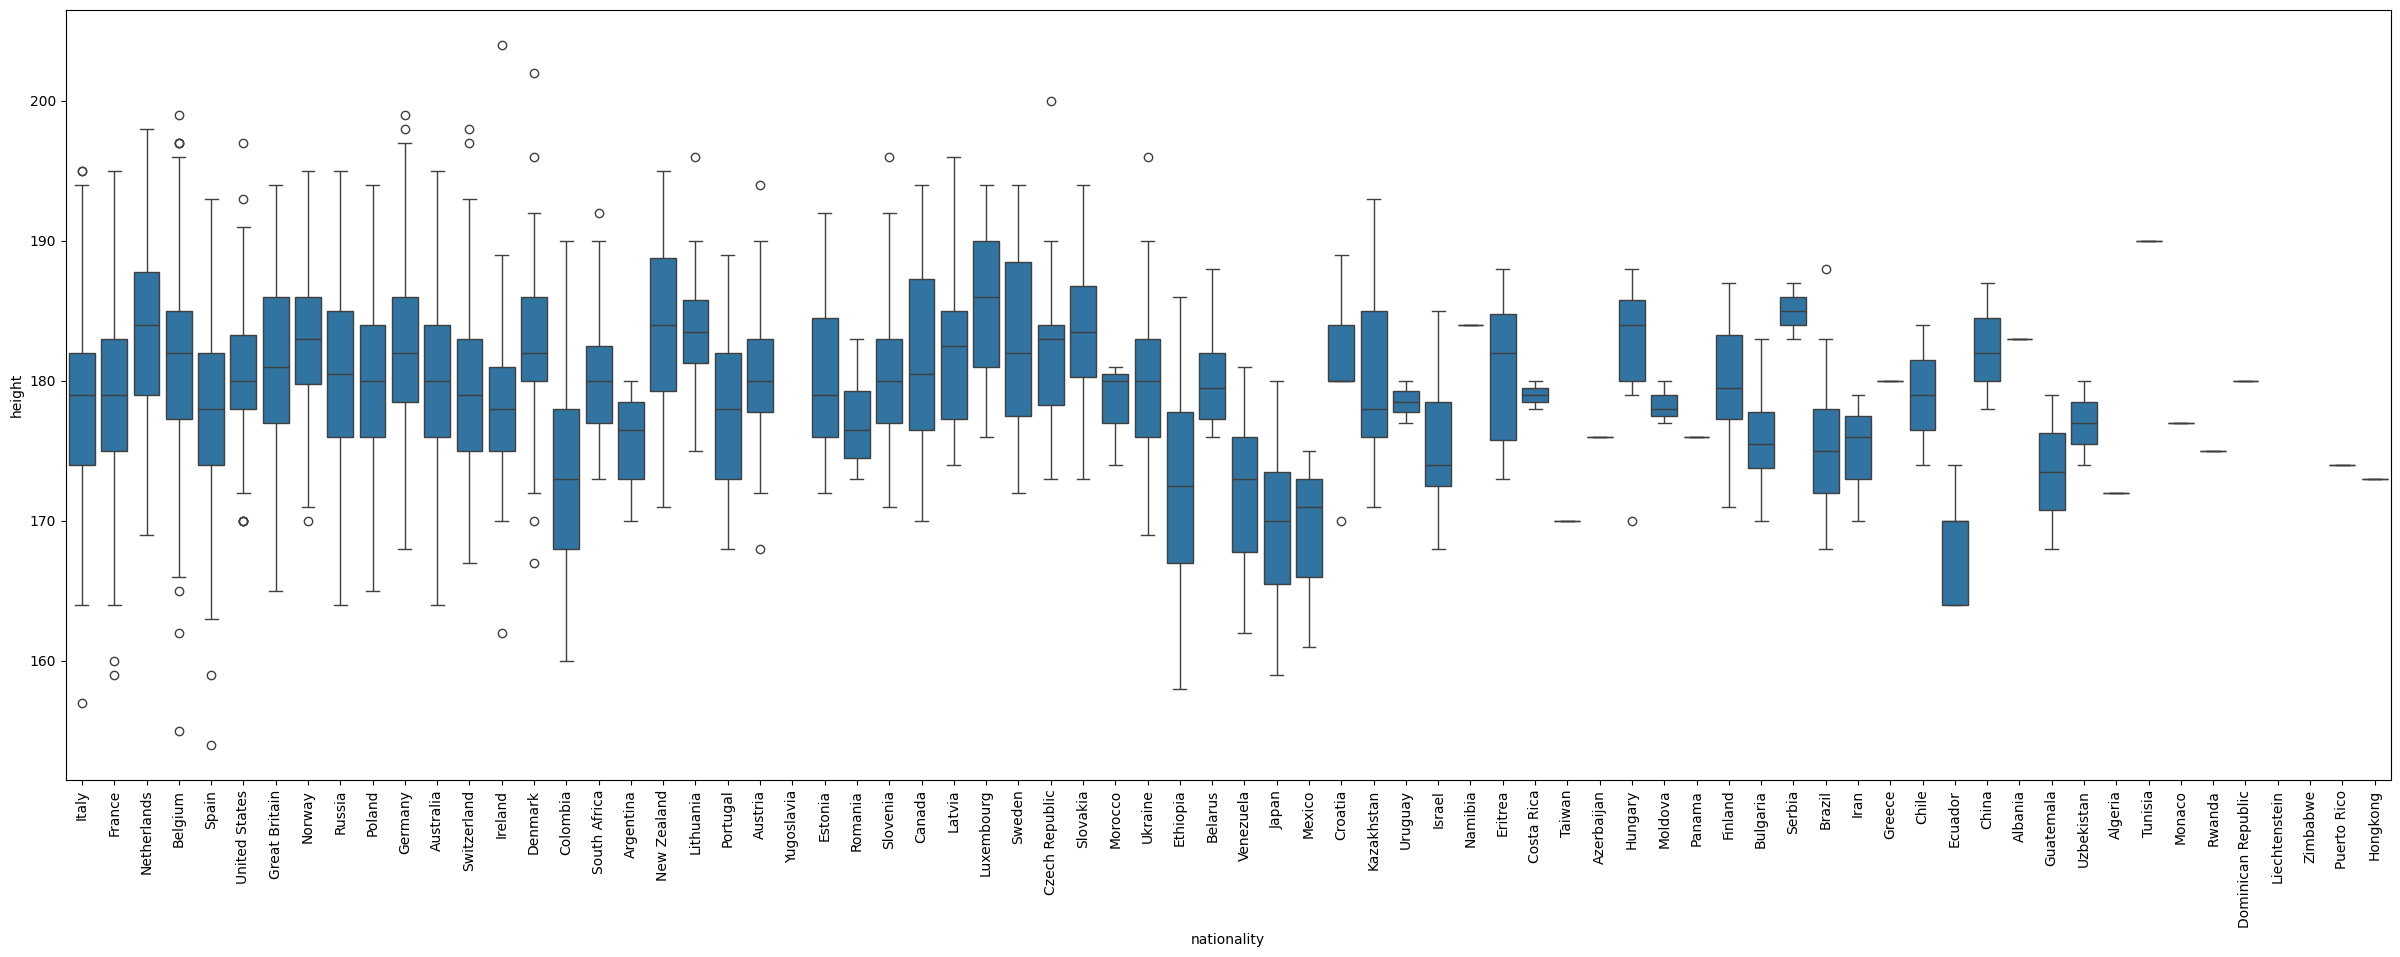

In [43]:
plt.figure(figsize=(30, 10))
sb.boxplot(x='nationality', y='height', data=dataset)
plt.xticks(rotation=90);
plt.show()

I boxplot, soprattutto quelli delle nazioni che costituiscono gran parte del dataset, sono pressoché simili. La nazionalità non sembrerebbe influire così tanto sull'altezza. Forse si può ignorare(?)

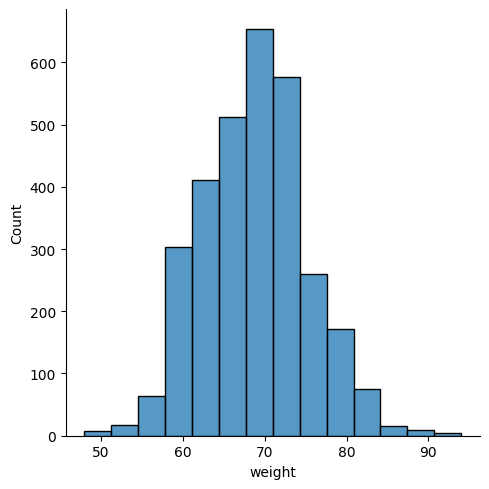

In [17]:
sb.displot(dataset, 
                x="weight", 
                kind="hist",
                row_order="desc",
                bins=n_bins)

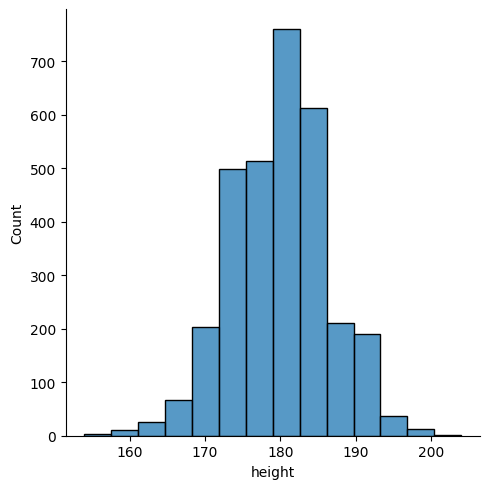

In [18]:
sb.displot(dataset, 
                x="height", 
                kind="hist",
                row_order="desc",
                bins=n_bins)

In [44]:
dataset[dataset['nationality'] == 'Colombia']['nationality'].value_counts()

nationality
Colombia    195
Name: count, dtype: int64

Un problema di usare nazionalità per le altezze è che per diverse nazioni hai "troppi" pochi ciclisti, risulterebbe in una statistica poco signfiicativa

In [20]:
dataset[dataset['height'].isnull()]['nationality'].value_counts()

nationality
Italy             626
Belgium           519
Spain             510
France            341
Netherlands       186
Switzerland       135
Colombia          110
Germany            87
Portugal           73
Russia             58
United States      54
Great Britain      36
Denmark            30
Poland             26
Australia          25
Austria            17
Ukraine            17
Norway             14
Canada             12
Sweden             12
Lithuania          10
Czech Republic     10
South Africa        7
Slovenia            7
New Zealand         6
Ireland             6
Japan               6
Brazil              5
Venezuela           5
Luxembourg          4
Bulgaria            3
Kazakhstan          3
Slovakia            3
Uzbekistan          3
Argentina           3
Finland             3
Hungary             2
Mexico              2
Croatia             2
Serbia              2
Belarus             2
Yugoslavia          1
Panama              1
Latvia              1
Uruguay             

Obiettivo, sostituire i valori mantenendo la distribuzione

In [19]:
N = len(dataset[dataset['height'].notnull()])
bins = int(1 + 10/3 * math.log10(N))

dataset['height_discretized'] = pd.cut(dataset['height'], bins=bins, labels=[i for i in range(1, bins+1)])

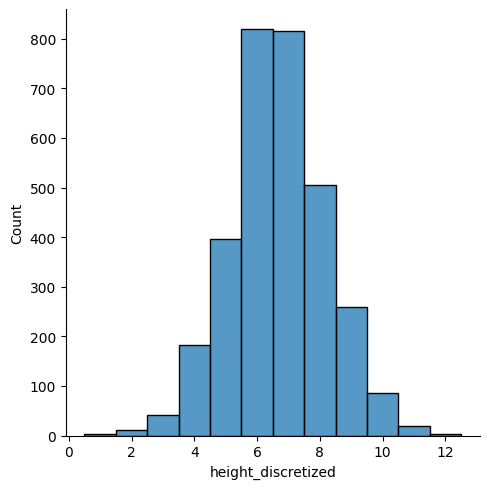

In [20]:
sb.displot(dataset, 
                x="height_discretized", 
                kind="hist",
                row_order="desc",
                bins=len(dataset['height_discretized'].unique()))

In [21]:
dataset['height_discretized'].value_counts(normalize=True).sort_index()
# probabilità di ogni classe di altezza

height_discretized
1     0.001273
2     0.003818
3     0.013045
4     0.058225
5     0.125994
6     0.260579
7     0.259625
8     0.160675
9     0.082405
10    0.027362
11    0.006045
12    0.000955
Name: proportion, dtype: float64

In [22]:
probabilities = dataset['height_discretized'].value_counts(normalize=True).sort_index().to_list()
print(probabilities)
classes = [i for i in range(1, bins+1)] # the values to be extracted

generator = np.random.default_rng(seed=None)

dataset['height_discretized'].fillna(generator.choice(a=classes, p=probabilities), inplace=True)
#TODO: risolvere problema della generazione randomica (il metodo 'choice' non sembra generare in modo corretto)

'''for index, row in dataset.iterrows():
    if pd.isnull(row['height_discretized']):
        p = random.uniform(0, 1)

        for i in range(len(probabilities)):
            if p <= probabilities[i]:
                print(f"index: {index}, p: {p}, i: {i}, class: {classes[i]}")
                dataset.at[index, 'height_discretized'] = classes[i]
                break'''

[0.0012726694241170856, 0.003818008272351257, 0.013044861597200128, 0.05822462615335666, 0.12599427298759147, 0.26057906458797325, 0.25962456251988547, 0.16067451479478206, 0.08240534521158129, 0.02736239261851734, 0.006045179764556157, 0.0009545020680878142]


/tmp/ipykernel_58841/2802081395.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['height_discretized'].fillna(generator.choice(a=classes, p=probabilities), inplace=True)


'for index, row in dataset.iterrows():\n    if pd.isnull(row[\'height_discretized\']):\n        p = random.uniform(0, 1)\n\n        for i in range(len(probabilities)):\n            if p <= probabilities[i]:\n                print(f"index: {index}, p: {p}, i: {i}, class: {classes[i]}")\n                dataset.at[index, \'height_discretized\'] = classes[i]\n                break'

In [23]:
dataset['height_discretized'].isnull().sum()

np.int64(0)

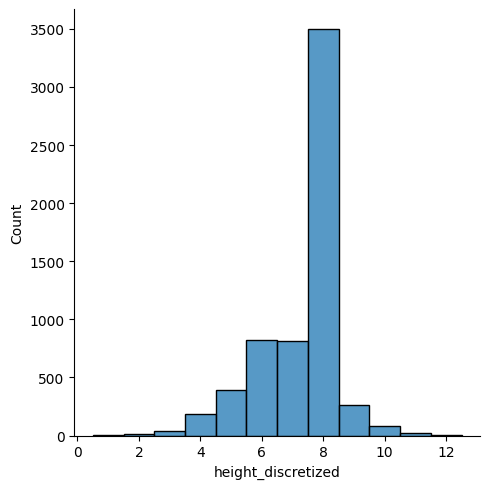

In [24]:
sb.displot(dataset, 
                x="height_discretized", 
                kind="hist",
                row_order="desc",
                bins=len(dataset['height_discretized'].unique()))